<a href="https://colab.research.google.com/github/VenkataRamanaTulluri/SocialNetworkAnalysis/blob/main/CommunityDetectionAndPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import pandas as pd

'Dataset: Edges in a Github network'

df = pd.read_csv('git_edges.csv') 
G_git = nx.from_pandas_edgelist(df, 'id_1', 'id_2')
G_git.graph['name']='Github Social Network'
print(nx.info(G_git))

Name: Github Social Network
Type: Graph
Number of nodes: 37700
Number of edges: 289003
Average degree:  15.3317


In [ ]:
'''
Centrality measures of nodes
'''

eigCent = nx.eigenvector_centrality(G_git)
print("Eigenvector Centrality:", eigCent, sep="\n")
degCent = nx.degree_centrality(G_git)
print("Degree Centrality:", degCent, sep="\n")

Eigenvector Centrality:
{0: 4.693393144799167e-05, 23977: 0.006980590267136982, 1: 0.0009515081279617861, 34526: 0.00036362236101085724, 2370: 0.007654892705264466, 14683: 0.010424931010256456, 29982: 0.040748714135578436, 21142: 0.048107945601792206, 20363: 0.027777365313849337, 23830: 0.004482297058360392, 34035: 0.002033092575946399, 6067: 4.181977393576917e-05, 19720: 0.0061467193842731525, 20183: 7.325182540132352e-05, 3: 0.00010457264095430921, 4950: 7.023652758516793e-07, 18029: 0.0025083876905591107, 3358: 0.002912660340277038, 34935: 0.004105366088703813, 5916: 0.006025327684435773, 4: 8.647310490703645e-06, 2865: 0.00022343445127802445, 9342: 0.0010629088209215404, 5: 0.0020266967922017163, 27803: 0.3016546270787933, 6: 0.004883553219157108, 18612: 0.003774538456362733, 18876: 0.025808123099744305, 31890: 0.35594895516626784, 17647: 0.003933090863817776, 18562: 0.03580966255008622, 7: 0.002592619816224739, 37493: 0.013337559901652783, 33643: 0.03424248369942212, 30199: 0.0453

Eigenvector Centrality - [31890, 27803, 35773, 19222, 13638, 36652, 7027, 36628, 9051, 3712, 35008, 19253, 2078, 10001, 30002]
Degree Centrality - [31890, 27803, 35773, 19222, 13638, 36652, 18163, 9051, 35008, 10001, 36628, 7027, 19253, 2078, 33671]
Subgraph of these nodes:


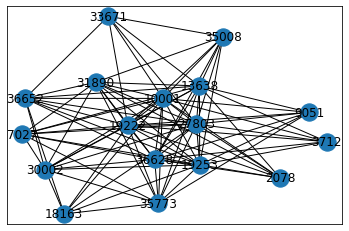

In [ ]:
'''
Top 15 nodes according to each centrality measure
'''

eigCentHead = sorted(eigCent, key=eigCent.get, reverse=True)[:15]
print("Eigenvector Centrality -", eigCentHead)
degCentHead = sorted(degCent, key=degCent.get, reverse=True)[:15]
print("Degree Centrality -", degCentHead)

CentHead = eigCentHead + degCentHead
print("Subgraph of these nodes:")
G_git_subgraph = G_git.subgraph(CentHead)
nx.draw_networkx(G_git_subgraph, pos = nx.kamada_kawai_layout(G_git_subgraph))

In [ ]:
'''
Community Detection 
'''

from networkx.algorithms import community

print('KERNIGHAN–LIN ALGORITHM: Partition a graph into two blocks')
communities_by_kl = community.kernighan_lin_bisection(G_git_subgraph)
print("Communities:", communities_by_kl, sep="\n")

'Community metrics'

print("Coverage -", community.coverage(G_git_subgraph, communities_by_kl))
print("Modularity -", community.modularity(G_git_subgraph, communities_by_kl))
print("Performance -", community.performance(G_git_subgraph, communities_by_kl))
# print(community.is_partition(G_git_subgraph, communities_by_kl))
print()

print('GIRVAN–NEWMAN METHOD: Finds communities in a graph')
communities_generator = community.girvan_newman(G_git_subgraph)
top_level_communities = next(communities_generator)
print("Top-level communities:", sorted(map(sorted, top_level_communities)), sep="\n")
print()
next_level_communities = next(communities_generator)
print("Next-level communities(1):", sorted(map(sorted, next_level_communities)), sep="\n")
print("Coverage -", community.coverage(G_git_subgraph, next_level_communities))
print("Modularity -", community.modularity(G_git_subgraph, next_level_communities))
print("Performance -", community.performance(G_git_subgraph, next_level_communities))
print()
next_level2_communities = next(communities_generator)
print("Next-level communities(2):", sorted(map(sorted, next_level2_communities)), sep="\n")
print("Coverage -", community.coverage(G_git_subgraph, next_level2_communities))
print("Modularity -", community.modularity(G_git_subgraph, next_level2_communities))
print("Performance -", community.performance(G_git_subgraph, next_level2_communities))


KERNIGHAN–LIN ALGORITHM: Partition a graph into two blocks
Communities:
({36652, 10001, 31890, 7027, 30002, 18163, 19253, 35773}, {35008, 3712, 13638, 33671, 27803, 36628, 19222, 9051, 2078})
Coverage - 0.5434782608695652
Modularity - 0.04324196597353494
Performance - 0.5882352941176471

GIRVAN–NEWMAN METHOD: Finds communities in a graph
Top-level communities:
[[2078, 3712, 7027, 9051, 10001, 13638, 18163, 19222, 19253, 27803, 30002, 31890, 35008, 35773, 36628, 36652], [33671]]

Next-level communities(1):
[[2078, 7027, 9051, 10001, 13638, 18163, 19222, 19253, 27803, 30002, 31890, 35008, 35773, 36628, 36652], [3712], [33671]]
Coverage - 0.8695652173913043
Modularity - -0.006379962192816731
Performance - 0.7279411764705882

Next-level communities(2):
[[2078, 7027, 9051, 10001, 13638, 19222, 19253, 27803, 30002, 31890, 35008, 35773, 36628, 36652], [3712], [18163], [33671]]
Coverage - 0.7934782608695652
Modularity - -0.014236767485822342
Performance - 0.7279411764705882


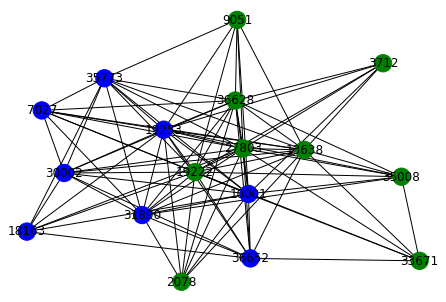

In [ ]:
color_map = []
for node in G_git_subgraph:
    if node in communities_by_kl[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')      

nx.draw(G_git_subgraph, node_color=color_map, with_labels=True)

In [ ]:
'''
Functions: Scatter Plots and Line Plots
'''

import matplotlib.pyplot as plt

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


Nodes:
[31890, 27803, 35773, 19222, 13638, 36652, 7027, 36628, 9051, 3712, 35008, 19253, 2078, 10001, 30002, 31890, 27803, 35773, 19222, 13638, 36652, 18163, 9051, 35008, 10001, 36628, 7027, 19253, 2078, 33671]
Corresponding degree:
[9458, 7085, 3324, 2958, 2468, 2343, 1485, 1507, 1797, 1264, 1571, 1404, 1368, 1568, 1055, 9458, 7085, 3324, 2958, 2468, 2343, 1924, 1797, 1571, 1568, 1507, 1485, 1404, 1368, 1347]


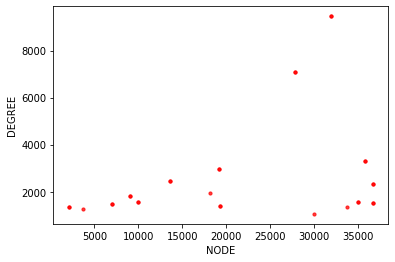

In [ ]:
'''
scatter plot: influential nodes vs degrees
'''

'Calculating degree of each node in CentHead list(FOR SCATTER PLOT)'
CentHeadDegree = []
for i in CentHead:
  CentHeadDegree.append(nx.degree(G_git, i))

print("Nodes:", CentHead, sep="\n")
print("Corresponding degree:", CentHeadDegree, sep="\n")

scatterplot(CentHead, CentHeadDegree, "NODE", "DEGREE")

Node's degree:
[9458, 7085, 3324, 2958, 2468, 2343, 1924, 1797, 1571, 1568, 1507, 1485, 1404, 1368, 1347]
Node's centrality measure:
[0.25088198625958247, 0.18793601952306427, 0.08817210005570439, 0.07846361972466113, 0.06546592747818245, 0.062150189660203185, 0.05103583649433672, 0.04766704687126979, 0.0416721928963633, 0.041592615188731794, 0.03997453513355792, 0.039390965277593566, 0.03724236717154301, 0.03628743467996499, 0.03573039072654447]


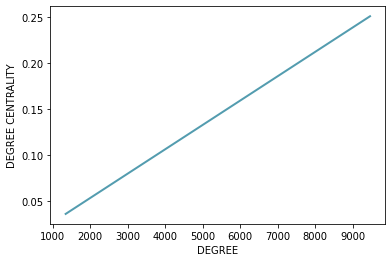

In [ ]:
'''
line plot: degree vs degree centrality measure 
'''

'Calculating degree of each node in degCentHead list(FOR LINE PLOT)'
degCentHeadDegree = []
for i in degCentHead:
  degCentHeadDegree.append(nx.degree(G_git, i))

'Calculating centrality value of each node in degCentHead list(FOR LINE PLOT)'
degCentHead2 = sorted(degCent.items(), key=lambda item: item[1], reverse=True)[:15]
degCentHeadValues=[]
for elem in degCentHead2:
	degCentHeadValues.append(elem[1])
  
print("Node's degree:", degCentHeadDegree, sep="\n")
print("Node's centrality measure:", degCentHeadValues, sep="\n")

lineplot(degCentHeadDegree, degCentHeadValues, "DEGREE", "DEGREE CENTRALITY")

Node's degree:
[9458, 7085, 3324, 2958, 2468, 2343, 1485, 1507, 1797, 1264, 1571, 1404, 1368, 1568, 1055]
Node's centrality measure:
[0.35594895516626784, 0.3016546270787933, 0.16167672528839555, 0.14884182734999724, 0.11946064577011832, 0.09569858887615354, 0.08875812915440212, 0.08767009821030974, 0.08279723170816022, 0.08137353374980946, 0.08133393894190215, 0.07812118772482511, 0.07291266857441782, 0.07028027955712741, 0.06723122807474442]


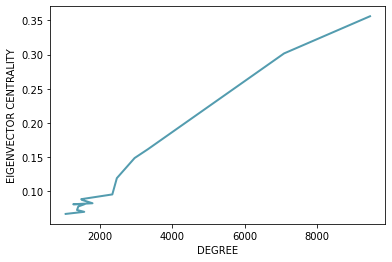

In [ ]:
'''
line plot: degree vs eigenvector centrality measure 
'''

'Calculating degree of each node in eigCentHead list(FOR LINE PLOT)'
eigCentHeadDegree = []
for i in eigCentHead:
  eigCentHeadDegree.append(nx.degree(G_git, i))

'Calculating centrality value of each node in eigCentHead list(FOR LINE PLOT)'
eigCentHead2 = sorted(eigCent.items(), key=lambda item: item[1], reverse=True)[:15]
eigCentHeadValues=[]
for elem in eigCentHead2:
	eigCentHeadValues.append(elem[1])
  
print("Node's degree:", eigCentHeadDegree, sep="\n")
print("Node's centrality measure:", eigCentHeadValues, sep="\n")

lineplot(eigCentHeadDegree, eigCentHeadValues, "DEGREE", "EIGENVECTOR CENTRALITY")